In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)



In [4]:
# reflect the tables
Base.classes.keys()

['station', 'measurement']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Eploratory Preciptation Analysis

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
inspector.get_columns("measurement")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

In [9]:
inspector.get_columns("station")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [11]:
#print(dt.date.today())
#print(dt.datetime.now(dt.)) #timestamp
#print(dt.timedelta(days=365))

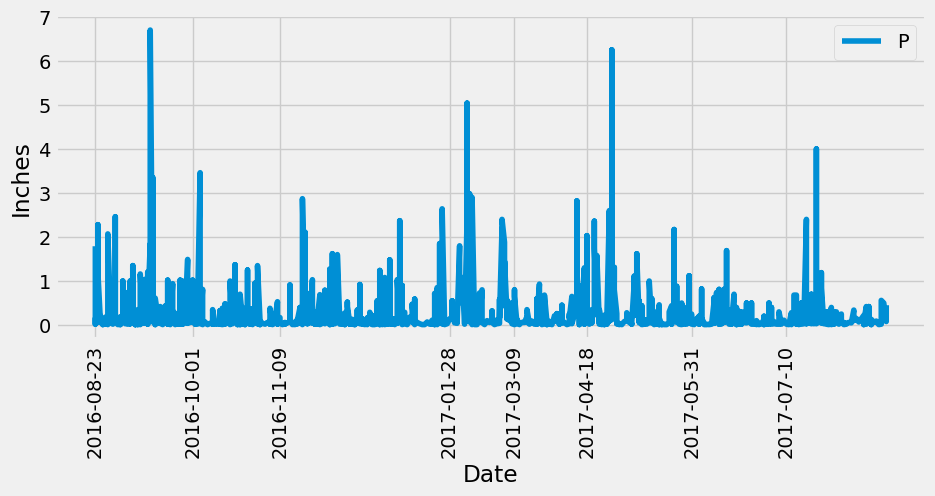

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# the most recent date in the data set is ** 2017-08-23 **

# Starting from the most recent data point in the database. 
most_recent_date = '2017-8-23'

# Calculate the date one year from the last date in data set.
last12_month=dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement).filter(Measurement.date < most_recent_date).filter(Measurement.date >=last12_month).\
filter(Measurement.prcp).all()
Preciptation = []
lists_last_12month=[]
for prc in prcp_data:
   Preciptation.append(prc.prcp)
   lists_last_12month.append(prc.date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df =pd.DataFrame({"Preciptation":Preciptation,"Date":lists_last_12month})
prcp_df.head()

# Sort the dataframe by date "Preciptation":prcp_data
sorted_df=prcp_df.sort_values( by = "Date",ascending=True)
sorted_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

figure=plt.figure(figsize=(10,4))
ticks = ["2016-08-23","2016-10-01","2016-11-09","2017-01-28","2017-03-09","2017-04-18","2017-05-31","2017-07-10"]
plt.style.use('fivethirtyeight')
plt.plot(sorted_df["Date"],sorted_df["Preciptation"])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(ticks,rotation= 90)
plt.legend("Preciptation")
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summry_statice=sorted_df["Preciptation"].describe()

# ****converting to dataframe ****
summary_statistics_df = pd.DataFrame({"Preciptation":summry_statice})
summary_statistics_df



,Preciptation
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [15]:
inspector.get_columns("station")


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()




[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Answer the following question: which station id has the greatest number of observations?
session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()

('USC00519281', 2772)

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [19]:
#Design a query to get the previous 12 months of temperature observation (TOBS) data.
# ** step 1 finding earliest date
#** step 2 finding the last of last 12 month.

In [20]:
#Query the previous 12 months of TOBS data for that station.
#lets find the earlieast date using descending order for station =USC00519281
session.query(Measurement.date).\
filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()

   

('2017-08-18',)

In [21]:
#** step 2 finding the last of last 12 month using time delta
dt.date(2017,8,18)-dt.timedelta(days=365)

datetime.date(2016, 8, 18)

In [22]:
temp = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date <'2017-08-18').\
filter(Measurement.date >= '2016-08-18').all()
# lets convert it to normal list 
temp_list = []
for t in temp:
    temp_list.append(t.tobs)
# lets convert it to normal list 



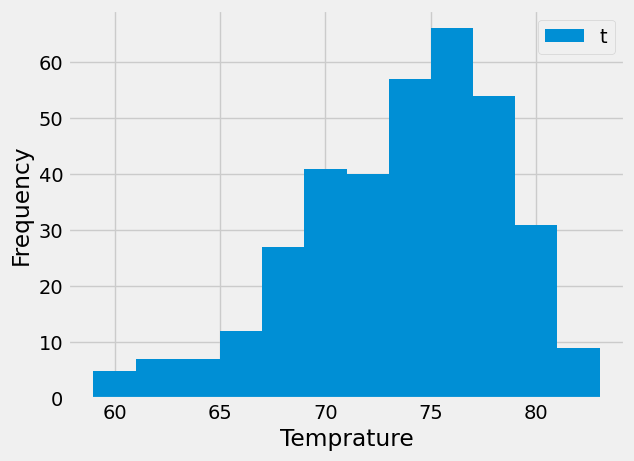

In [23]:
#Plot the results as a histogram with bins=12
plt.style.use('fivethirtyeight')
plt.hist(temp_list,bins=12)
plt.xlabel("Temprature")
plt.ylabel("Frequency")
plt.legend("tobs")

plt.show()

In [24]:
session.close()